HOG features computed successfully.


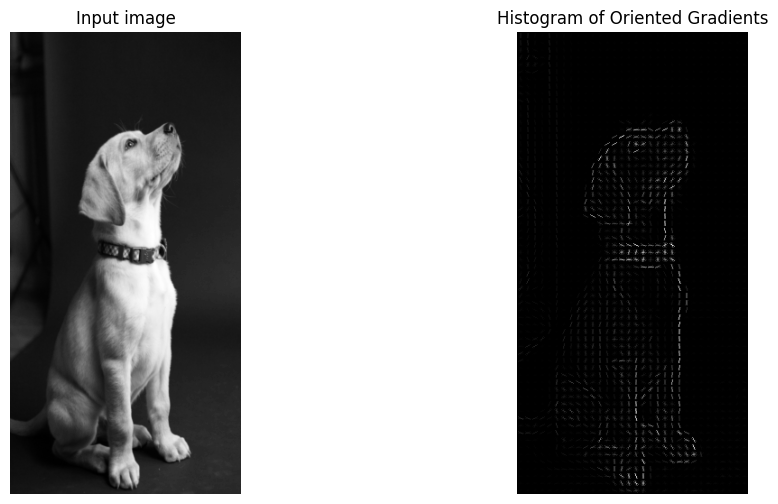

HOG features:
[0.35105565 0.         0.         ... 0.13521251 0.14490112 0.06516403]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color,exposure, transform
from skimage.feature import hog

# Read the image
image_path = "/Users/ayaanchoudhury/Desktop/Python Coding/OpenCV and Images/HOG Implementation/dog_image.jpg"
image = io.imread(image_path)

# Resize the image. Generally, it should be 128x64 but it can be anything.
image_resized = transform.resize(image, (512, 256))
# Convert into gray-scale
image_gray = color.rgb2gray(image_resized)

# Define the features 
# bin size = 9
# cell size = 8x8
# block size = 2x2 cells
# normalisation process followed is L2-Hys
# visualisation = true returns an image with HOG Features
hog_features , hog_image = hog(image_gray, 
                              orientations=9, 
                              pixels_per_cell=(8, 8), 
                              cells_per_block=(2, 2), 
                              block_norm='L2-Hys', 
                              visualize=True)





# Check if the HOG features contain all zeros
if np.all(hog_features == 0):
    print("Warning: HOG features are all zeros.")
else:
    print("HOG features computed successfully.")




# Some conditions for showing the image. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)  # this displays a figure with two subplots side by side
ax1.axis('off')   # turns off the axis
ax1.imshow(image_gray, cmap=plt.cm.gray)  # Displays the grayscale image.
ax1.set_title('Input image')    # title for the grayscale image

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)   # turns off the axis
ax2.set_title('Histogram of Oriented Gradients')   # title for the output image
plt.show()

print("HOG features:")
print(hog_features)